In [1]:
import json
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
def get_results(train=True):
    global filenames
    filenames = [f for f in os.listdir(os.getcwd()+'./results/') if not f.endswith('checkpoints')]
    filenames.extend([f for f in os.listdir(os.getcwd()+'./results_test/') if not f.endswith('checkpoints')\
                     and not f in filenames])
    for filename in sorted(filenames):
        if train:
            try:
                with open('./results/'+ filename,'r') as f: yield filename, json.load(f)
            except:
                continue
        else:
            try:
                with open('./results_test/'+ filename,'r') as f: yield filename, json.load(f)
            except:
                pass

In [3]:
def mk_dataframe(results_train, results_test=None):
    filename_train, results_train = results_train
    if results_test != None:
        filename_test, results_test = results_test
        assert filename_train==filename_test, 'filenames should be the same'
        results_train.update(results_test)
        print("Model: ", filename_test.strip('.json'))
        return pd.DataFrame.from_dict(results_train, orient='index').fillna('_')
    else:
        print("Model: ", filename_train.strip('.json'))
        return pd.DataFrame.from_dict(results_train, orient='index')

In [4]:
def show_plots(metric, idx):
    folder = 'losses/' if metric == 'loss' else 'accs/'
    filename = './plots/' + folder + os.listdir(os.getcwd() + './plots/' + folder)[idx]  
    print("Model: ", re.sub(r'./plots/' + folder, '', filename.replace('.png', '')))
    image = img.imread(filename)
    plt.clf()
    plt.figure(dpi=100)
    plt.imshow(image)
    plt.show()

In [5]:
results_train = get_results()
results_test = get_results(train=False)

In [6]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_pos_types_homogeneous_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,_,0.902141,0.887068,0.639431,0.534873,0.62328
test,_,0.901013,0.873718,0.631982,0.524826,0.614376
train,0.905622,0.993923,0.999428,0.909304,_,_


In [7]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_pos_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.898792,0.873430,0.647924,0.53583,0.61036
test,_,0.898797,0.867068,0.648638,0.535845,0.610576
train,0.964072,0.979212,0.998910,0.974260,_,_


In [8]:
mk_dataframe(next(iter(results_train)))

Model:  100d_bert_avg_types_homogeneous_kg


,max,agg,sel,where
dev,0.535830,0.901304,0.884556,0.651633
train,0.913522,0.997730,0.999464,0.916025


In [9]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_types_mixed_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.902022,0.937074,0.738366,0.642062,0.628066
test,_,0.900127,0.928372,0.732236,0.632426,0.614123
train,0.914255,0.996389,0.999553,0.917812,_,_


In [10]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.899151,0.867807,0.675679,0.556406,0.624357
test,_,0.898733,0.857441,0.669411,0.548322,0.620329
train,0.959639,0.987220,0.999106,0.972133,_,_


In [11]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_max-pool_pos_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.898911,0.876660,0.559876,0.467281,0.561909
test,_,0.898353,0.866054,0.558961,0.460291,0.554402
train,0.953454,0.980910,0.998695,0.968451,_,_


In [12]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_max-pool_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.899749,0.863979,0.671970,0.549946,0.620768
test,_,0.897467,0.848195,0.669981,0.546295,0.620899
train,0.957905,0.988989,0.998731,0.969631,_,_


In [13]:
mk_dataframe(next(iter(results_test)))

Model:  100d_pos_types_homogeneous_kg


,agg,sel,where,lf_acc,ex_acc
dev,0.901188,0.940618,0.599169,0.522922,0.653563
test,0.901619,0.929773,0.592618,0.510613,0.630598


In [14]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_pos_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.898100,0.917933,0.401544,0.343468,0.472328
test,_,0.899981,0.906909,0.400328,0.339737,0.467217
train,0.962949,0.983408,0.998563,0.978706,_,_


In [15]:
mk_dataframe(next(iter(results_train)))

Model:  100d_types_homogeneous_kg


,max,agg,sel,where
dev,0.638361,0.901188,0.941330,0.749644
train,0.911541,0.995688,0.999468,0.910033


In [16]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_types_single_kg


,max,agg,sel,where,qm_acc,ex_acc
dev,_,0.898456,0.922328,0.773515,0.663302,0.730879
test,_,0.897588,0.912578,0.768533,0.650501,0.719028
train,0.966001,0.986443,0.998669,0.978404,_,_


In [17]:
mk_dataframe(next(iter(results_train)))

Model:  600d_bert_avg_pos_types_homogeneous_kg


,max,agg,sel,where
dev,0.573992,0.900586,0.899988,0.690752
train,0.920976,0.990884,0.999643,0.929037


In [18]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_bert_avg_pos_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,_,0.897954,0.888623,0.653188,0.544563,0.633808
test,_,0.899050,0.877074,0.646042,0.537872,0.621279
train,0.967879,0.978622,0.999392,0.987756,_,_


In [19]:
mk_dataframe(next(iter(results_train)))

Model:  600d_bert_avg_types_mixed_kg


,max,agg,sel,where
dev,0.635363,0.899390,0.936356,0.745185
train,0.916203,0.994477,0.999714,0.921387


In [20]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_bert_avg_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,_,0.897715,0.882522,0.697213,0.579136,0.647565
test,_,0.897530,0.871944,0.699620,0.576694,0.645788
train,0.979212,0.991152,0.999285,0.985253,_,_


In [21]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_bert_max-pool_pos_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,_,0.897715,0.885752,0.621605,0.517885,0.602106
test,_,0.898923,0.874668,0.623496,0.515959,0.60209
train,0.979927,0.988632,0.999196,0.990455,_,_


In [22]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_bert_max-pool_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,_,0.899988,0.881924,0.695418,0.581888,0.649719
test,_,0.899620,0.868841,0.690627,0.575744,0.645978
train,0.983037,0.994691,0.999053,0.988435,_,_


In [23]:
mk_dataframe(next(iter(results_train)))

Model:  600d_pos_types_homogeneous_kg


,max,agg,sel,where
dev,0.652613,0.900238,0.939905,0.765796
train,0.913617,0.991021,0.999468,0.921035


In [24]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_pos_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,_,0.898337,0.923515,0.366508,0.317221,0.460689
test,_,0.899540,0.916168,0.373496,0.321408,0.466272
train,0.975956,0.988058,0.998864,0.984970,_,_


In [25]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  600d_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,_,0.896081,0.925416,0.782304,0.669477,0.731473
test,_,0.898658,0.914908,0.778044,0.65913,0.72646
train,0.962168,0.968201,0.999006,0.987756,_,_


Model:  100d_bert_avg_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

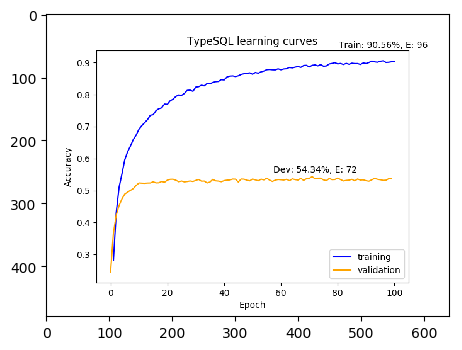

Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

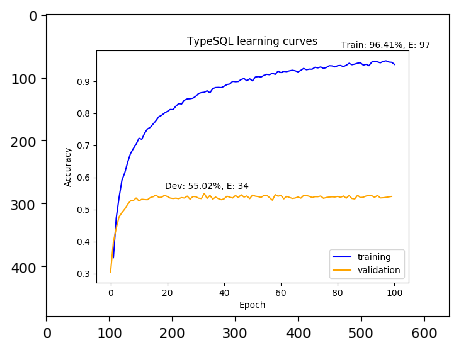

Model:  100d_bert_avg_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

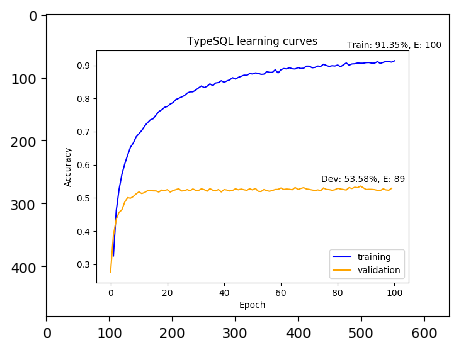

Model:  100d_bert_avg_types_mixed_kg


<Figure size 432x288 with 0 Axes>

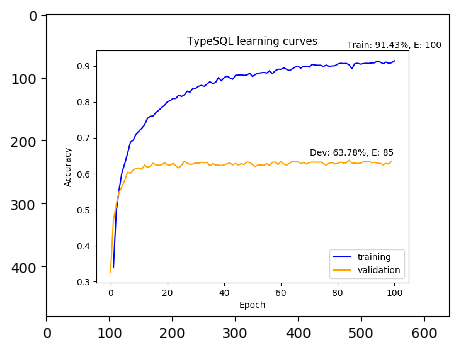

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

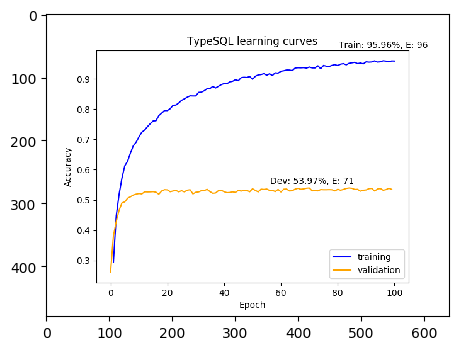

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

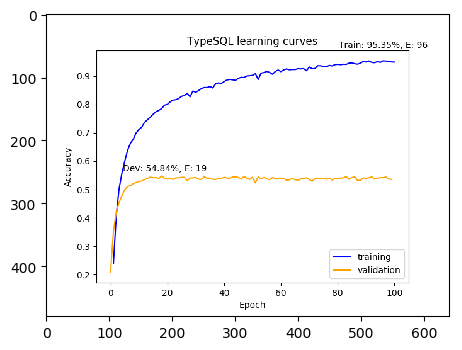

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

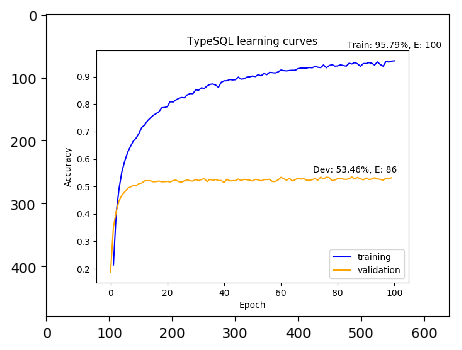

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

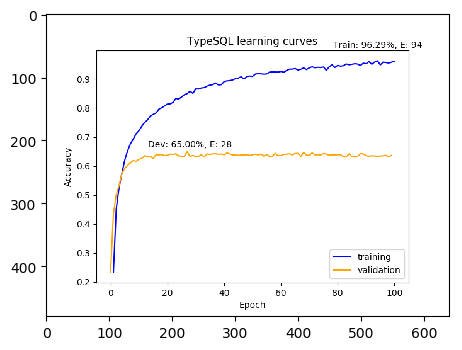

Model:  100d_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

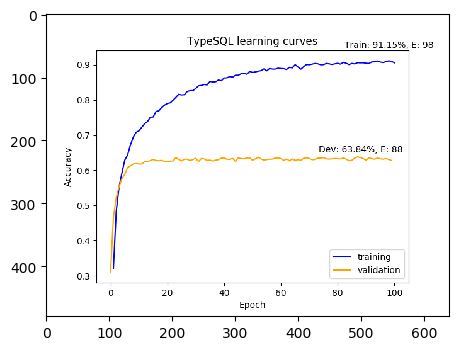

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

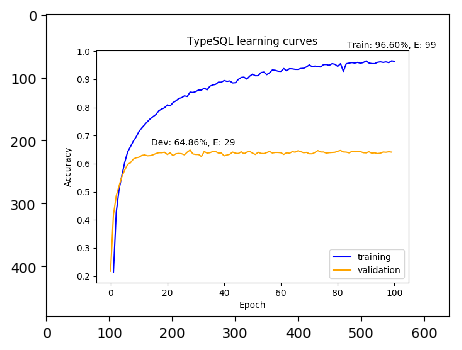

Model:  600d_bert_avg_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

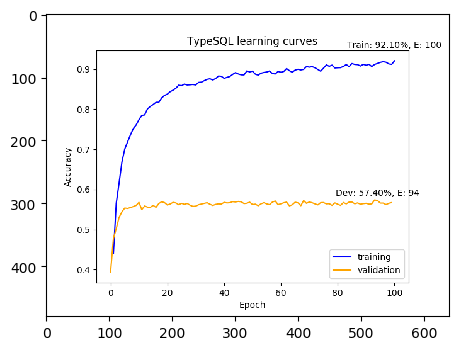

Model:  600d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

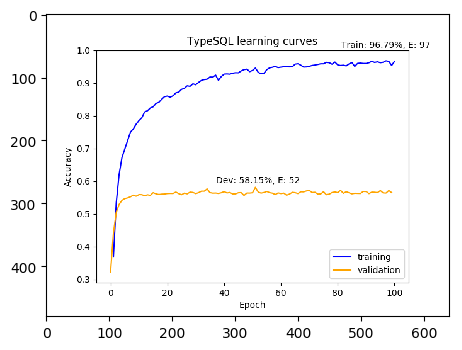

Model:  600d_bert_avg_types_mixed_kg


<Figure size 432x288 with 0 Axes>

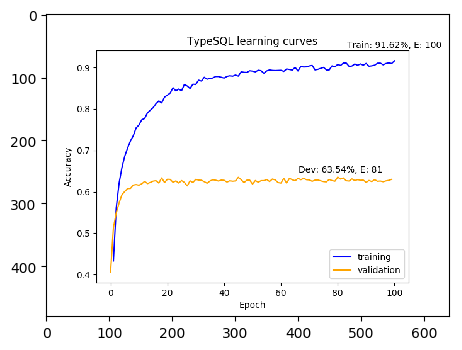

Model:  600d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

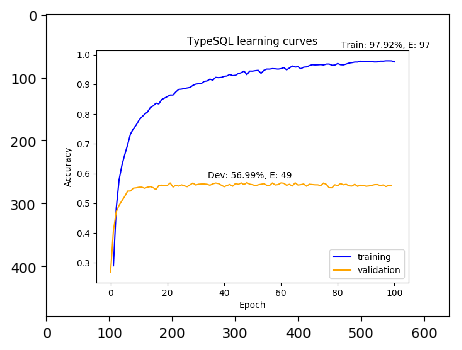

Model:  600d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

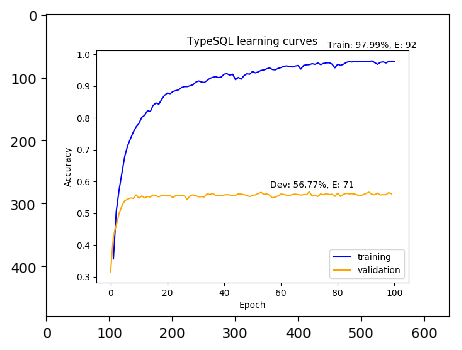

Model:  600d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

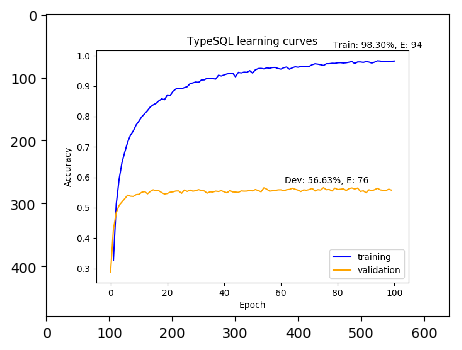

Model:  600d_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

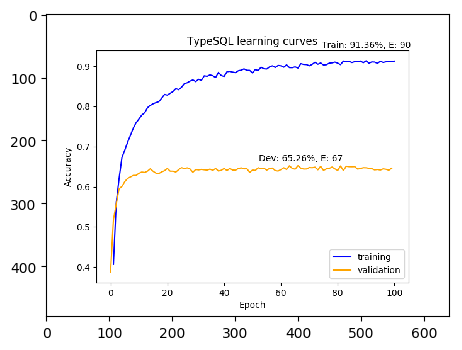

Model:  600d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

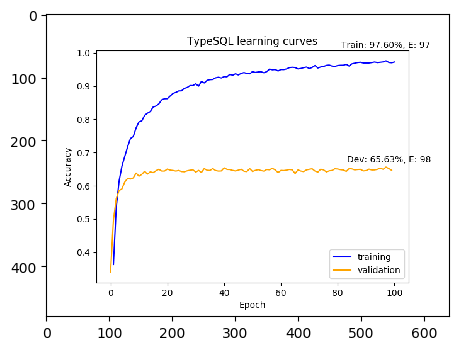

Model:  600d_types_single_kg


<Figure size 432x288 with 0 Axes>

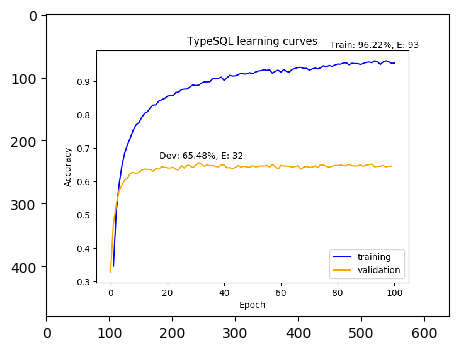

IndexError: list index out of range

In [26]:
for i in range(len(filenames)):
    show_plots('acc', i)

In [ ]:
for i in range(len(filenames)):
    show_plots('loss', i)